<a href="https://colab.research.google.com/github/Ruchika-11/EVA-7/blob/main/Assignment_9/S9_Assign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cloning Git Repo

In [1]:
%rm -rf 'EvaLibrary'
!git clone https://github.com/Ruchika-11/EvaLibrary.git

Cloning into 'EvaLibrary'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 39 (delta 13), reused 26 (delta 10), pack-reused 0
Unpacking objects: 100% (39/39), done.


In [2]:
%cd /content/EvaLibrary/

/content/EvaLibrary


In [4]:
import sys
sys.path.append('/EvaLibrary/')

!pip install git+https://github.com/albumentations-team/albumentations.git

  Cloning https://github.com/albumentations-team/albumentations.git to /tmp/pip-req-build-5pj3eii_
  Running command git clone -q https://github.com/albumentations-team/albumentations.git /tmp/pip-req-build-5pj3eii_


# Importing libraries

In [ ]:
pip install torch-lr-finder

In [ ]:
from models.custom_resnet import CustomResnet
from src.dataloader import *
from src.train import *
from src.test import *
from utils.gradcam import *
from utils.visualize import *
from utils.identify_image import *
from utils.misclassified import *
from utils.denormalization import *
from main import *

In [5]:
import torch
import os

print(os.getcwd())

/content/EvaLibrary


In [ ]:
!pip install torchsummary
!pip install -U albumentations

from torchsummary import summary
device = torch.device("cuda" if use_cuda else "cpu")

In [ ]:
from torchvision.utils import make_grid
import torchvision.transforms as transforms
from torchvision.transforms import ToTensor
import torchvision
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
import torch.optim as optim
from torch.optim.lr_scheduler import OneCycleLR
from torch_lr_finder import LRFinder
%matplotlib inline

# Model Summary

In [ ]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = CustomResnet().to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1, 256,

# One cycle Policy Implementation

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))



Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 3.70E-02


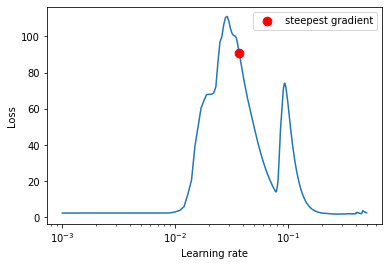

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.90, weight_decay=0.005)
criterion = nn.CrossEntropyLoss()
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(trainloader, val_loader=testloader,end_lr=1, num_iter=100, step_mode="linear",diverge_th=50)
lr_finder.plot(log_lr=False) 
lr_finder.reset() 

# Training

In [ ]:
import torch.optim as optim
from torch.optim.lr_scheduler import OneCycleLR
model = NewResnet().to(device)

In [ ]:
train_accuracies = []
train_losses = []
test_accuracies = []
test_losses = []
learningRates = []
epochs=24
max_epoch = 5
lr = 0.01

In [ ]:
criterion = nn.CrossEntropyLoss()
lrmax = 0.037
optimizer = optim.SGD(model.parameters(), lr=start_lr, momentum=0.9, weight_decay=0.005)
scheduler = OneCycleLR(optimizer=optimizer, max_lr=lrmax,
                                  epochs=epochs, steps_per_epoch=len(trainloader),
                                  pct_start=5/epochs,div_factor=8)

In [ ]:
for epoch in range(epochs):
  print("EPOCH:", epoch+1, 'LR:',optimizer.param_groups[0]['lr'])
  train(model, device, trainloader, optimizer, scheduler, criterion, epoch,train_losses,train_accuracy )
  test(model, device, criterion, testloader,test_losses, test_accuracy )
  for param_group in optimizer.param_groups:
    learningRates.append(param_group['lr']) 

EPOCH: 1 LR: 0.004624999999999997


Loss=1.530872106552124 Batch_id=97 Accuracy=31.67: 100%|██████████| 98/98 [01:05<00:00,  1.50it/s]



Test set: Average loss: 0.0030, Accuracy: 4410/10000 (44.10%)

EPOCH: 2 LR: 0.007728773790896266


Loss=1.3288702964782715 Batch_id=97 Accuracy=50.10: 100%|██████████| 98/98 [01:05<00:00,  1.50it/s]



Test set: Average loss: 0.0022, Accuracy: 6037/10000 (60.37%)

EPOCH: 3 LR: 0.015849866685431615


Loss=1.1006373167037964 Batch_id=97 Accuracy=58.52: 100%|██████████| 98/98 [01:05<00:00,  1.51it/s]



Test set: Average loss: 0.0025, Accuracy: 6461/10000 (64.61%)

EPOCH: 4 LR: 0.02587401949849496


Loss=0.9372355937957764 Batch_id=97 Accuracy=65.66: 100%|██████████| 98/98 [01:05<00:00,  1.50it/s]



Test set: Average loss: 0.0016, Accuracy: 7212/10000 (72.12%)

EPOCH: 5 LR: 0.033957191732526454


Loss=0.9079457521438599 Batch_id=97 Accuracy=71.11: 100%|██████████| 98/98 [01:05<00:00,  1.50it/s]



Test set: Average loss: 0.0014, Accuracy: 7542/10000 (75.42%)

EPOCH: 6 LR: 0.036999973668439774


Loss=0.7062349915504456 Batch_id=97 Accuracy=75.65: 100%|██████████| 98/98 [01:05<00:00,  1.50it/s]



Test set: Average loss: 0.0012, Accuracy: 7973/10000 (79.73%)

EPOCH: 7 LR: 0.036742523794325105


Loss=0.5868841409683228 Batch_id=97 Accuracy=78.71: 100%|██████████| 98/98 [01:05<00:00,  1.50it/s]



Test set: Average loss: 0.0012, Accuracy: 7922/10000 (79.22%)

EPOCH: 8 LR: 0.03598747173370877


Loss=0.5253560543060303 Batch_id=97 Accuracy=81.14: 100%|██████████| 98/98 [01:05<00:00,  1.50it/s]



Test set: Average loss: 0.0013, Accuracy: 7868/10000 (78.68%)

EPOCH: 9 LR: 0.03475541333853057


Loss=0.4282555878162384 Batch_id=97 Accuracy=83.04: 100%|██████████| 98/98 [01:05<00:00,  1.50it/s]



Test set: Average loss: 0.0010, Accuracy: 8269/10000 (82.69%)

EPOCH: 10 LR: 0.03307995595007442


Loss=0.5135000944137573 Batch_id=97 Accuracy=83.83: 100%|██████████| 98/98 [01:05<00:00,  1.50it/s]



Test set: Average loss: 0.0012, Accuracy: 8082/10000 (80.82%)

EPOCH: 11 LR: 0.031006801678305985


Loss=0.43410223722457886 Batch_id=97 Accuracy=85.56: 100%|██████████| 98/98 [01:05<00:00,  1.50it/s]



Test set: Average loss: 0.0011, Accuracy: 8279/10000 (82.79%)

EPOCH: 12 LR: 0.028592500767449243


Loss=0.33271220326423645 Batch_id=97 Accuracy=86.69: 100%|██████████| 98/98 [01:05<00:00,  1.49it/s]



Test set: Average loss: 0.0009, Accuracy: 8400/10000 (84.00%)

EPOCH: 13 LR: 0.025902909052739613


Loss=0.4588501453399658 Batch_id=97 Accuracy=87.98: 100%|██████████| 98/98 [01:05<00:00,  1.50it/s]



Test set: Average loss: 0.0010, Accuracy: 8378/10000 (83.78%)

EPOCH: 14 LR: 0.02301139158491205


Loss=0.3296332359313965 Batch_id=97 Accuracy=89.07: 100%|██████████| 98/98 [01:05<00:00,  1.50it/s]



Test set: Average loss: 0.0008, Accuracy: 8649/10000 (86.49%)

EPOCH: 15 LR: 0.01999682142286541


Loss=0.335574209690094 Batch_id=97 Accuracy=90.16: 100%|██████████| 98/98 [01:05<00:00,  1.49it/s]



Test set: Average loss: 0.0008, Accuracy: 8644/10000 (86.44%)

EPOCH: 16 LR: 0.016941428182222416


Loss=0.2035992294549942 Batch_id=97 Accuracy=91.47: 100%|██████████| 98/98 [01:05<00:00,  1.49it/s]



Test set: Average loss: 0.0007, Accuracy: 8822/10000 (88.22%)

EPOCH: 17 LR: 0.013928555025772069


Loss=0.23934228718280792 Batch_id=97 Accuracy=92.28: 100%|██████████| 98/98 [01:05<00:00,  1.49it/s]



Test set: Average loss: 0.0007, Accuracy: 8820/10000 (88.20%)

EPOCH: 18 LR: 0.011040385279248182


Loss=0.17508341372013092 Batch_id=97 Accuracy=93.51: 100%|██████████| 98/98 [01:05<00:00,  1.49it/s]



Test set: Average loss: 0.0007, Accuracy: 8764/10000 (87.64%)

EPOCH: 19 LR: 0.008355700684439308


Loss=0.15654341876506805 Batch_id=97 Accuracy=94.32: 100%|██████████| 98/98 [01:05<00:00,  1.50it/s]



Test set: Average loss: 0.0006, Accuracy: 8954/10000 (89.54%)

EPOCH: 20 LR: 0.0059477324386414294


Loss=0.1270587146282196 Batch_id=97 Accuracy=95.56: 100%|██████████| 98/98 [01:05<00:00,  1.49it/s]



Test set: Average loss: 0.0005, Accuracy: 9107/10000 (91.07%)

EPOCH: 21 LR: 0.003882163638495153


Loss=0.15649941563606262 Batch_id=97 Accuracy=96.69: 100%|██████████| 98/98 [01:05<00:00,  1.49it/s]



Test set: Average loss: 0.0005, Accuracy: 9183/10000 (91.83%)

EPOCH: 22 LR: 0.002215337616332496


Loss=0.11126405000686646 Batch_id=97 Accuracy=97.36: 100%|██████████| 98/98 [01:05<00:00,  1.49it/s]



Test set: Average loss: 0.0005, Accuracy: 9200/10000 (92.00%)

EPOCH: 23 LR: 0.0009927210409468926


Loss=0.08400893956422806 Batch_id=97 Accuracy=98.07: 100%|██████████| 98/98 [01:05<00:00,  1.49it/s]



Test set: Average loss: 0.0005, Accuracy: 9221/10000 (92.21%)

EPOCH: 24 LR: 0.00024766370539132344


Loss=0.07467161118984222 Batch_id=97 Accuracy=98.21: 100%|██████████| 98/98 [01:05<00:00,  1.50it/s]



Test set: Average loss: 0.0005, Accuracy: 9230/10000 (92.30%)



# Graph

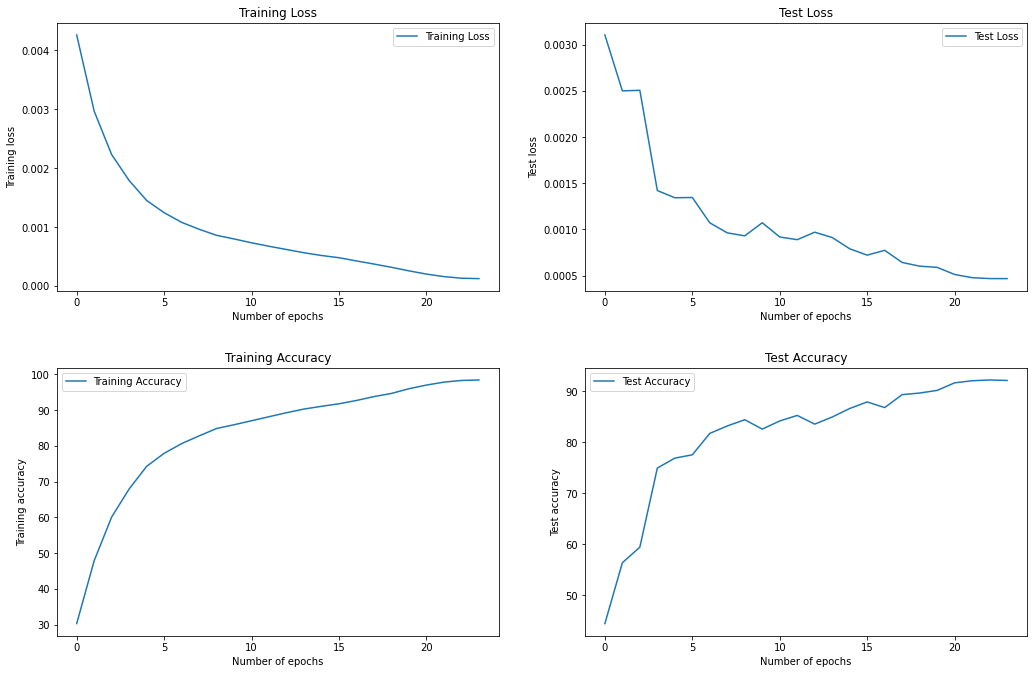

In [ ]:
plot_loss_accurracy(train_losses,train_accuracy, test_losses,  test_accuracy)





# Misclassified images and Gradcam

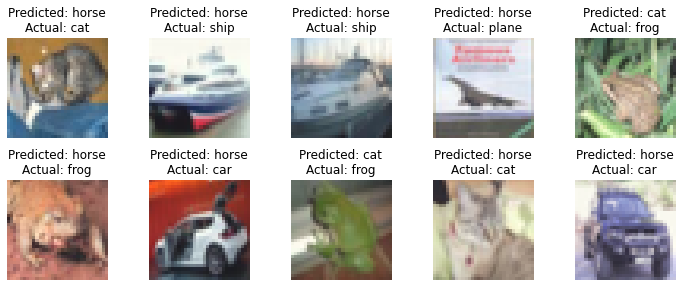

In [ ]:
plot_images(incorrect_images, classes)

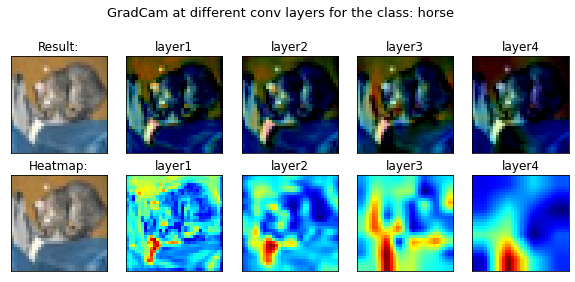

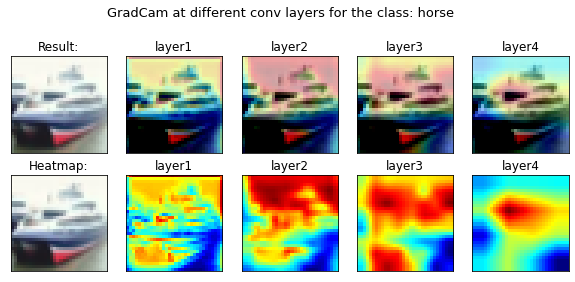

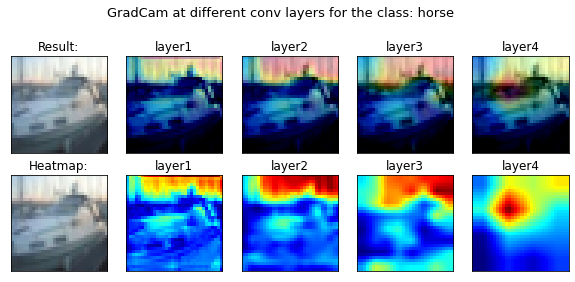

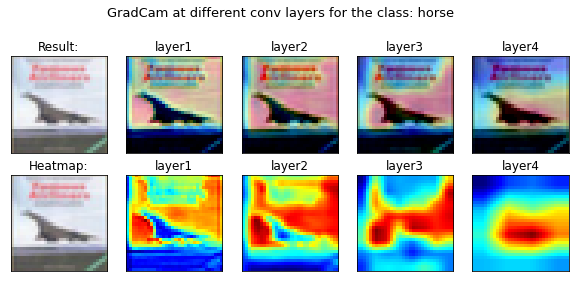

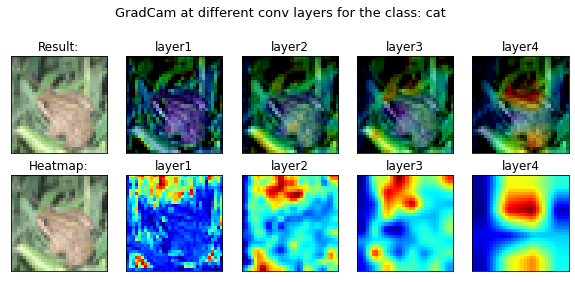

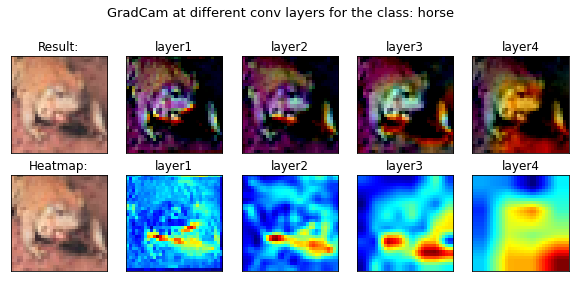

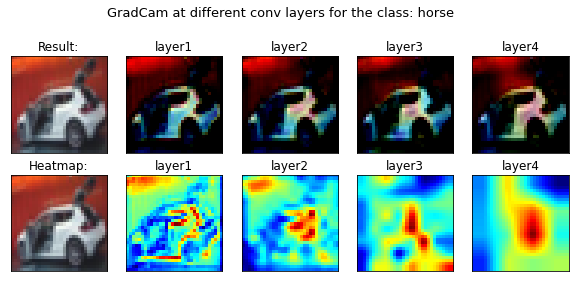

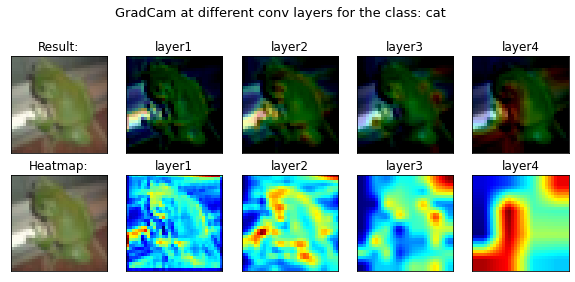

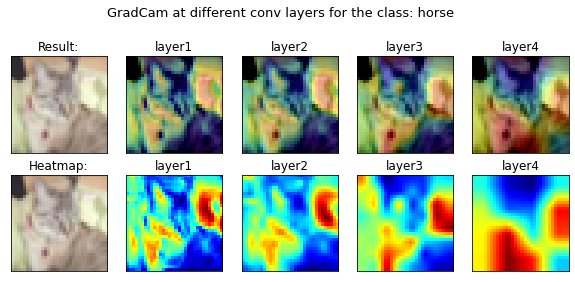

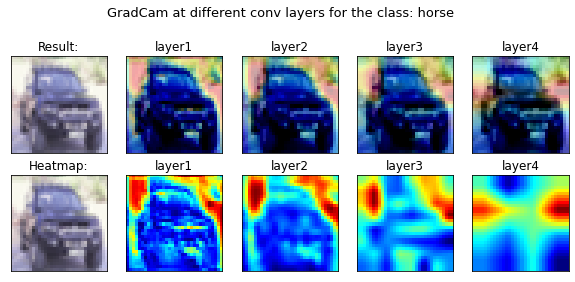

In [ ]:
incorrect_pred_imgs = []
for i in range(10):
  incorrect_pred_imgs.append(torch.as_tensor(incorrect_images[i]["img"]))
viz_cam(torch.stack(incorrect_pred_imgs), target_layers, metric="incorrect")